In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data=pd.read_csv("data_for_lr.csv")

In [47]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [48]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [49]:
data.shape

(700, 2)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [51]:
data.isna().sum()

x    0
y    1
dtype: int64

In [52]:
data.dropna(inplace=True)

In [53]:
data.shape

(699, 2)

In [54]:
data.shape[0]

699

In [55]:
train_input=np.array(data["x"][:500])
train_output=np.array(data["y"][:500])
test_input=np.array(data["x"][500:])
test_output=np.array(data["y"][500:])

In [56]:
np.random.randn()

0.19631239861031347

In [57]:
def predict(train_input,w,b):
    predictions=np.multiply(w,train_input)+b
    return predictions

In [58]:
def cost_function(predictions,train_output):
    cost=np.mean((predictions-train_output)**2)/2
    return cost

In [59]:
def update_parameters(train_input,predictions,train_output,learning_rate,w,b):
    w_temp=w-(learning_rate*np.mean((predictions-train_output)*train_input))
    b_temp=b-(learning_rate*np.mean(predictions-train_output))
    w=w_temp
    b=b_temp
    return w,b


In [60]:
def model(train_input,train_output,learning_rate,iterations):
#     w=np.random.randn()
#     b=np.random.randn()
    w=0
    b=0

    loss=[]
    for i in range(iterations):
        predictions=predict(train_input,w,b)
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        if i % (iterations/10) == 0:
            plt.figure(figsize=(10,6))
            plt.plot(train_input,train_output,"*",color="blue",label="actual data")
            plt.plot(train_input,predictions,"x",color="red" ,label="predicted data")
            plt.legend()
            plt.title(str(i)+"th model")
            plt.show()
        
        w,b=update_parameters(train_input,predictions,train_output,learning_rate,w,b)
    return w,b,loss
        

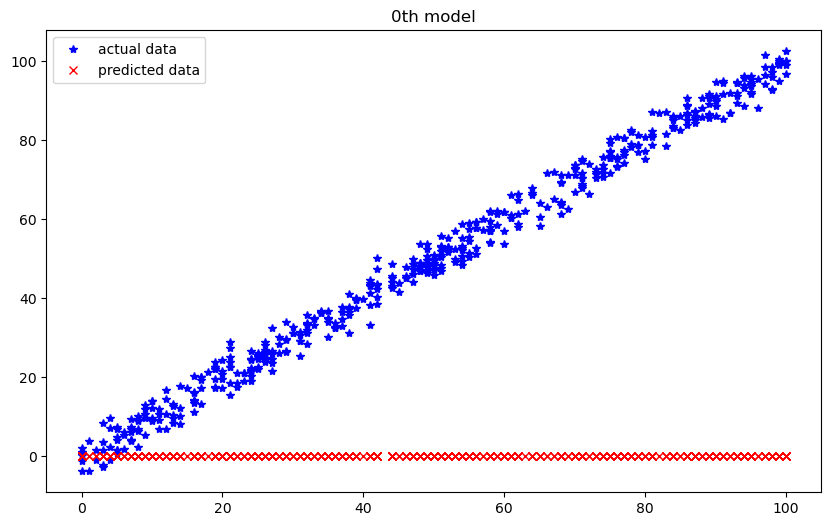

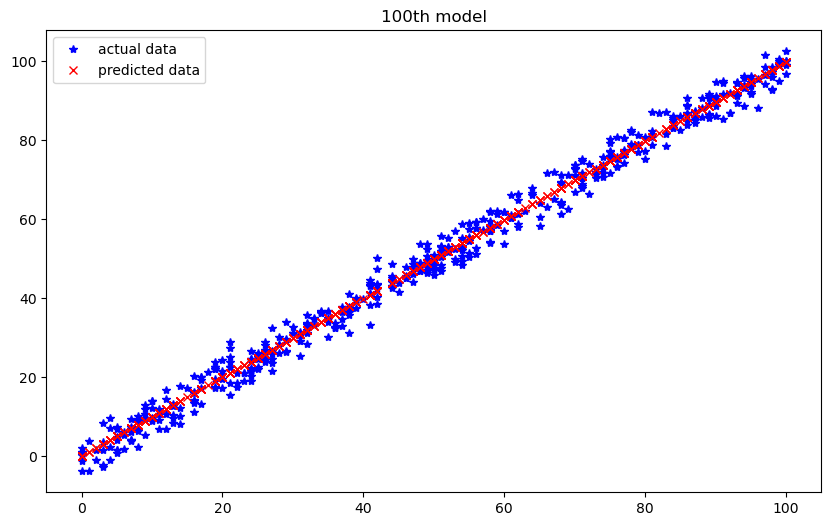

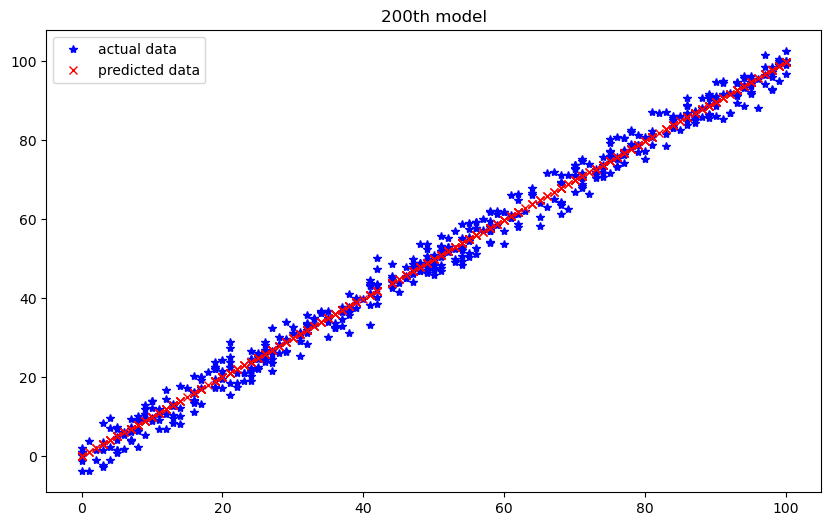

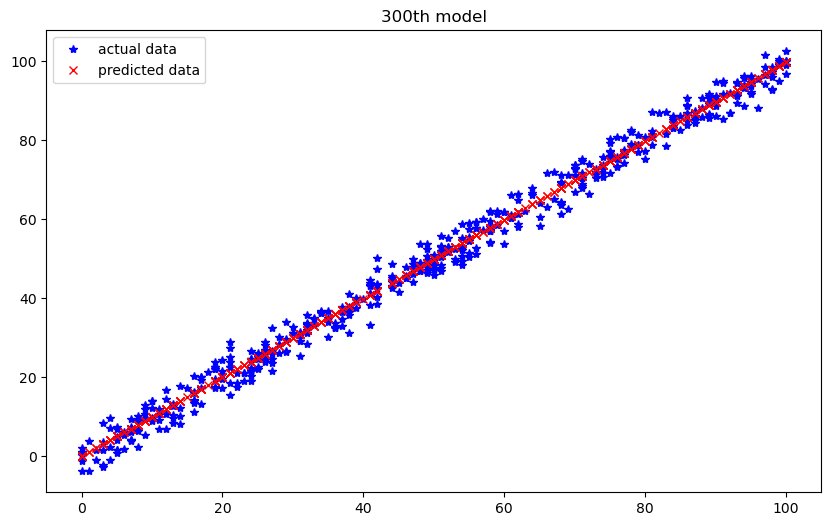

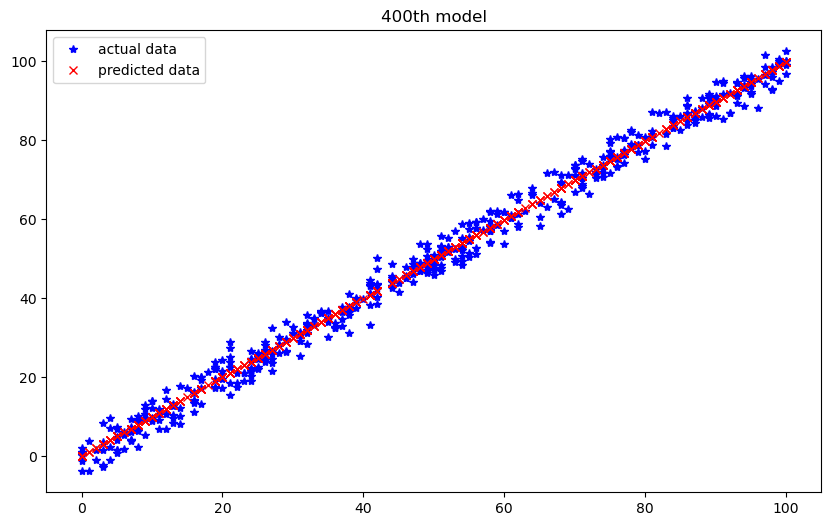

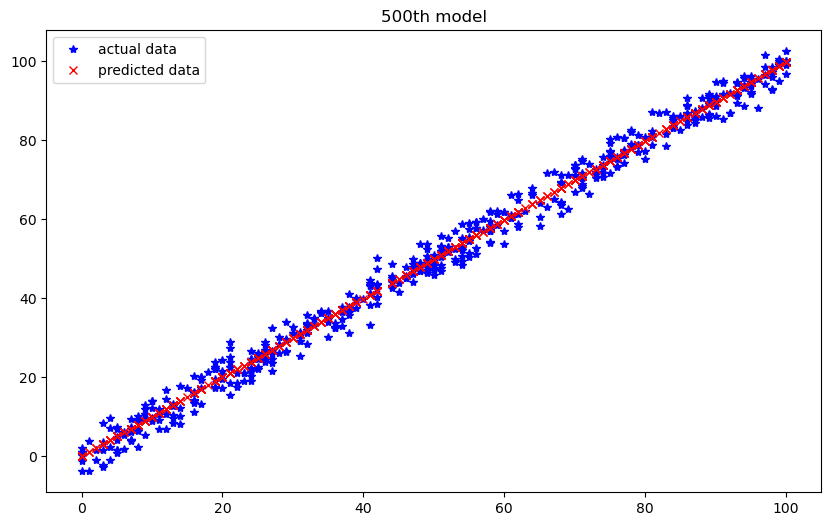

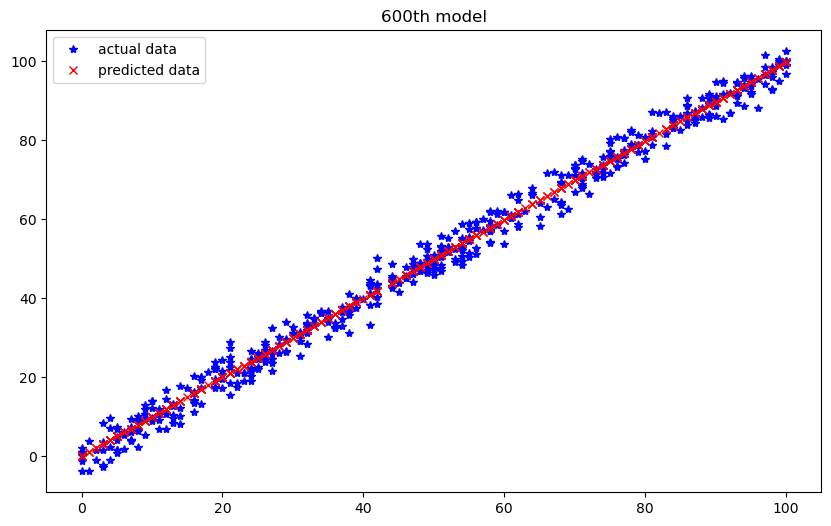

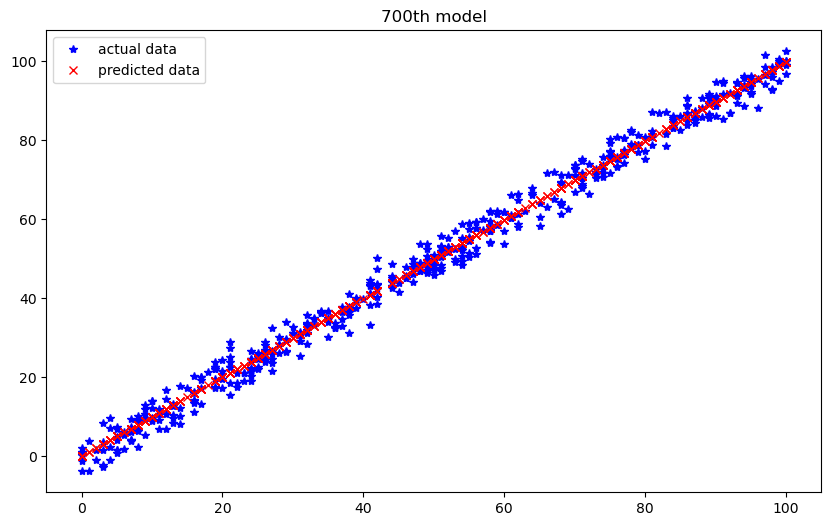

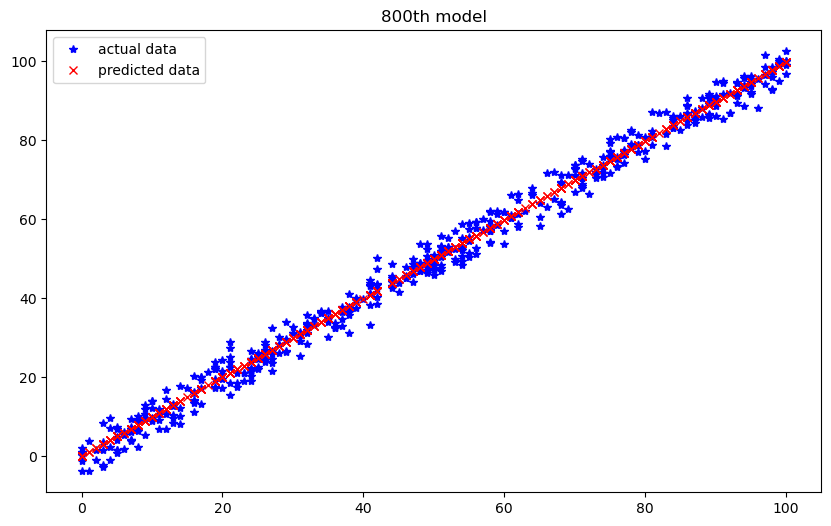

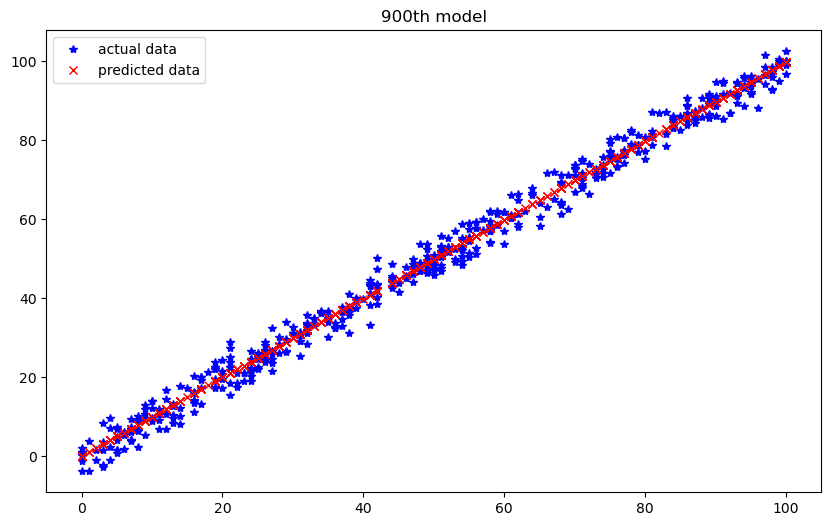

In [69]:
w,b,loss=model(train_input,train_output,0.0005,1000)

In [62]:
w

0.9972913955667005

In [63]:
b

0.008852451645531704

In [73]:
loss[-1]

3.9165372196739563

In [84]:
model_accuracy=100-loss[-1]

In [85]:
model_accuracy

96.08346278032604

In [86]:
test_predictions=predict(test_input,w,b)

In [87]:
test_predictions

array([ 4.97361493e+00,  6.08418348e+01,  4.68747798e+01,  9.77547657e+01,
        2.99147845e+01,  6.28371283e+01, -1.46189797e-02,  9.97500593e+01,
        1.79430231e+01,  2.99147845e+01,  9.77547657e+01,  1.59477295e+01,
        2.19336102e+01,  5.48559541e+01,  4.28841927e+01,  7.48088897e+01,
        9.07712383e+01,  4.58771330e+01,  8.47853576e+01,  5.48559541e+01,
        3.59006652e+01,  4.88700734e+01,  9.37641786e+01,  4.28841927e+01,
        2.19336102e+01,  3.68983120e+01,  2.39289038e+01,  9.47618254e+01,
        6.08418348e+01,  7.48088897e+01,  6.78253623e+01,  5.78488944e+01,
        4.97361493e+00,  5.28606605e+01,  7.97971237e+01,  8.27900640e+01,
        2.49265506e+01,  3.39053716e+01,  2.59241974e+01,  8.97735915e+01,
        5.98441880e+01,  4.88700734e+01,  1.89406699e+01,  9.17688850e+01,
        2.89171377e+01,  7.96655528e+00,  5.68512476e+01,  2.89171377e+01,
        1.89406699e+01,  8.07947704e+01,  4.98677202e+01,  1.49500828e+01,
        6.98206558e+01,  

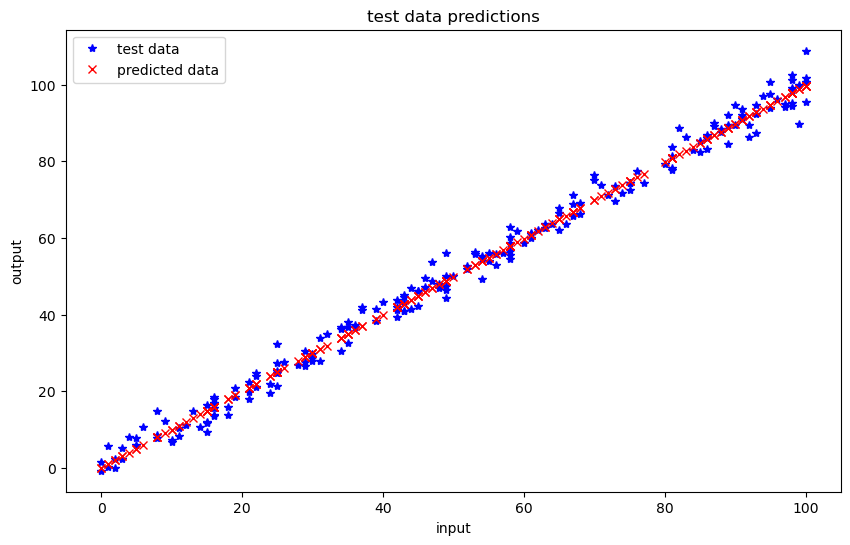

In [93]:
plt.figure(figsize=(10,6))
plt.plot(test_input,test_output,"*",color="blue",label="test data")
plt.plot(test_input,test_predictions,"x",color="red" ,label="predicted data")
plt.legend()
plt.title("test data predictions")
plt.xlabel("input")
plt.ylabel("output")
plt.show()


In [95]:
entire_data_predictions=predict(data["x"],w,b)

In [96]:
entire_data_predictions

0      23.928904
1      49.867720
2      14.950083
3      37.895959
4      86.780651
         ...    
695    57.848894
696    92.766532
697    81.792417
698    65.830069
699    96.757119
Name: x, Length: 699, dtype: float64

In [98]:
data["predictions"]=entire_data_predictions

In [99]:
data

,x,y,predictions
0,24.0,21.549452,23.928904
1,50.0,47.464463,49.867720
2,15.0,17.218656,14.950083
3,38.0,36.586398,37.895959
4,87.0,87.288984,86.780651
...,...,...,...
695,58.0,58.595006,57.848894
696,93.0,94.625094,92.766532
697,82.0,88.603770,81.792417
698,66.0,63.648685,65.830069
